In [17]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score

In [18]:
data = pd.read_csv("data/magic04.csv", index_col=0)
data['class'] = data['class'].replace('g',1)
data['class'] = data['class'].replace('h',0)
data.head()

feature_cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist"]
X = data[feature_cols]
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

K so 6688 0s, 12332 1s.
1.  fLength:  continuous  # major axis of ellipse [mm]
2.  fWidth:   continuous  # minor axis of ellipse [mm] 
3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
11.  class:    g,h         # gamma (signal), hadron (background)


In [19]:
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf = treeclf.fit(X_train, y_train)

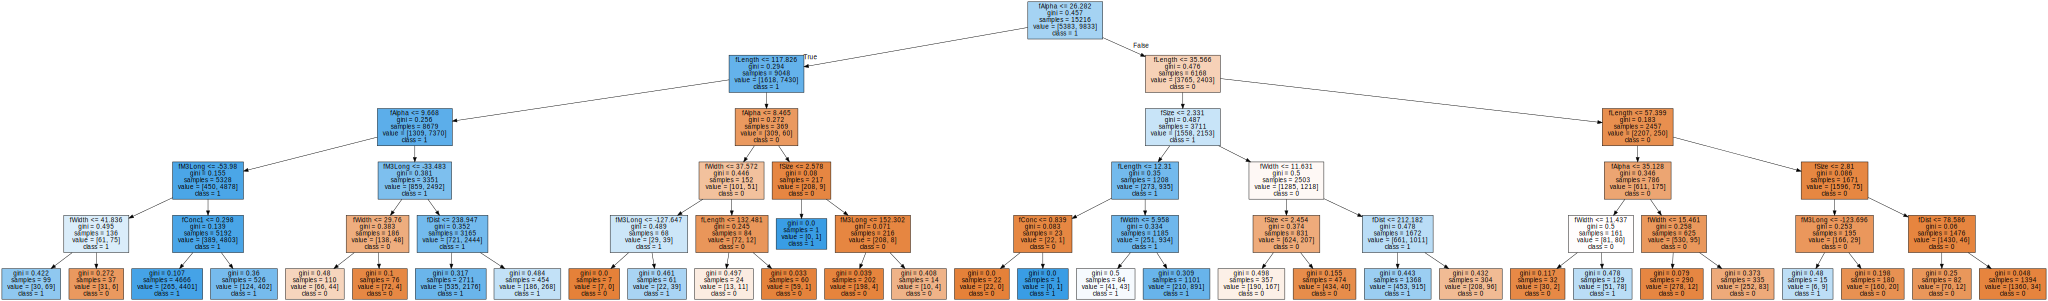

0.8215036803364879
[[ 793  512]
 [ 167 2332]]


0.872917836421486

In [20]:
dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols ,class_names=['0', '1'], filled = True)

graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

y_pred = treeclf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
f1_score(y_test, y_pred)

